<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week06_MultilinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6
# Multilinear Regression

Last time we looked at a simple linear regression model $sales = \beta_0 + \beta_1\cdot\textit{TV advertising budget}$. More generally, a linear model makes a prediction by computing a weighted sum of their input features (plus a constant).

**Reading: Chapter 4**

## Multilinear Regression: Model Assumptions
**Model**:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the number of features.
3. $x_i$ is the i-th feature value.
4. $\theta_j$ is the j-th model parameter (associated with $x_j$).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Toy example
columns = ['Homework', 'Midterm', 'Final']
data = pd.DataFrame({
    "Homework": [95, 70, 80, 100, 70],
    "Midterm": [90, 60, 80, 80, 85],
    "Final": [93, 66, 85, 60, 90]
}, index=["Alice", "Bob", "Clare", "David", "Eve"])

data.head()

,Homework,Midterm,Final
Alice,95,90,93
Bob,70,60,66
Clare,80,80,85
David,100,80,60
Eve,70,85,90


In this case:
- $x_1$ is the homework feature
- $x_2$ is the midterm feature
- $y$ is the final feature
- model is: $final = \theta_0 + \theta_1 * homework + \theta_2 * midterm$
- We need to come up with values for $\theta_0, \theta_1, \theta_2$ to complete the model.

**Objective**: Suppose that another student Fred has Homework score 85 and Midterm score 80. What is prediction of his final exam score?

## Multilinear Regression: Vectorized form

The multilinear model can also be written as:

**$\hat{y} = \theta\cdot\textbf{x}$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (1, x_1, ..., x_n)$ is the feature vector.
3. The symbol $\cdot$ represents the inner-product of two vectors. For example, $(1, 2, 3)\cdot (4, 5, 6) = 1\times 4 + 2\times 5 + 3\times 6 = 32$.

**Why is the expression $\theta\cdot\textbf{x}$ equivalent to $\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$?**

In [4]:
# Let's apply the linear regression tool in sci-kit learn on the toy example
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(data[["Homework", "Midterm"]], data[["Final"]]) 
# The input data requires two layers of brackets because the input features should be expressed as a list.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Retrieve the estimated parameter values.
print("Theta 0:", model_lr.intercept_)
print("Theta 1 and Theta 2:", model_lr.coef_)

Theta 0: [35.]
Theta 1 and Theta 2: [[-0.71627907  1.30697674]]


In [ ]:
# Apply the model to provide prediction for Fred
model_lr.predict([[85, 80],
                  [60, 60]])

array([[78.6744186 ],
       [70.44186047]])

In [6]:
# Remember prediction = theta0 + theta1 * homework + theta2 * midterm
theta0 = 35
theta1 = -0.716
theta2 = 1.307

prediction = theta0 + theta1 * 60 + theta2 * 60
print(prediction)

70.46000000000001


In [7]:
# Let's use the vector form to get the prediction.
# prediction = inner-product of the parameter vector and the feature vector.
parameter_vector = np.array([35, -0.716, 1.307])
feature_vector = np.array([1, 60, 60])

prediction = parameter_vector.dot(feature_vector)

print(prediction)

70.46


## Multilinear Regression: Cost Function
In order to calculate the best value for each parameter, we need a **cost function** that evaluates the errors made by a give set of parameter values. Here we use the **mean squared error (MSE)** function as the cost function:

$J(\textbf{X}, \theta) = \frac{1}{m}\sum_{i=1}^{m}\big(\theta\cdot\textbf{x}^{(i)} - y^{(i)}\big)^2$

Here $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example

In [ ]:
# Calculate the MSE cost of the toy example for the parameter values given by sci-kit learn.

theta = np.array([35, -0.716, 1.307])

list_errors = []

for i in data.index:
    # print(i)
    x = np.array([1, data.loc[i, "Homework"], data.loc[i, "Midterm"]])
    theta_dot_x = theta.dot(x)
    y = data.loc[i, "Final"]
    squared_error = (theta_dot_x - y) ** 2
    list_errors.append(squared_error)

print(list_errors)
print("MSE:", np.mean(list_errors))


[70.39210000000001, 7.290000000000015, 7.398399999999993, 63.361600000000124, 35.70062499999993]
MSE: 36.82854500000002


## Multilinear Regression: Training Algorithm 1
The value of $\theta$ that minimizes the cost function is given by the following **normal equation**:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$.

1. $\textbf{X}$ is an $m\times (n+1)$ matrix whose i-th row is $\textbf{x}^{(i)}$.
$$\textbf{X} = \begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_n \\
\vdots & \vdots &\vdots & \ddots & \vdots \\
1 & x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n \\
\end{pmatrix}$$
2. $$\textbf{y} = \begin{pmatrix}y^{(1)} \\ \vdots \\ y^{(m)}\end{pmatrix}$$.
3. The cost function $J(\theta)$ also has a matrix expression
$$J(\theta) = \frac{1}{m}(\textbf{X}\cdot\theta - \textbf{y})^T\cdot (\textbf{X}\cdot\theta - \textbf{y})$$

- $m$ represents the number of records in the training set.
- $n$ represents the number of input variables.

In [8]:
# Construct matrix X using np.hstack(), np.ones()

# 1. Construct a column of ones

X = np.hstack([np.ones([5, 1]), data[["Homework", "Midterm"]].values])
print(X)

[[  1.  95.  90.]
 [  1.  70.  60.]
 [  1.  80.  80.]
 [  1. 100.  80.]
 [  1.  70.  85.]]


In [9]:
# Construct vector y
y = data[["Final"]].values
print(y)

[[93]
 [66]
 [85]
 [60]
 [90]]


In [10]:
# Apply the normal equation to find theta

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("Theta:", theta)

Theta: [[35.        ]
 [-0.71627907]
 [ 1.30697674]]


## Multilinear Regression: Training Algorithm 2
The normal equation is not applicable when $\textbf{X}^T\cdot\textbf{X}$ is not invertible. It happens if:
- Several features are linearly dependent (for example, feature3 = feature1 + feature2)
- The number of features is greater than the number of training data (for example, DNA data)

When the matrix $\textbf{X}$ is too large, the normal equation may take too long to finish since it requires a matrix multiplication.

In these cases, we can use the **gradient descent** method to minimize the cost function instead.

Gradient descent with one variable ideally looks like this:
<img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." width="600">

Gradient descent with two variables ideally looks like this:
<img src="https://blog.paperspace.com/content/images/2019/09/F1-02.large.jpg" width="600">

Gradient descent is an iterative algorithm for finding the **local minimum** of a differentiable function.
- Choose an initial value of $\hat{\theta}$ and a **learning rate** $r$.
- For each iteration $k$, do:
    - Calculate the partial derivative of the cost function:
    $$
    \frac{\partial J(\hat{\theta})}{\partial \theta} = \frac{2}{m}\cdot\textbf{X}^T\cdot(\textbf{X}\cdot\theta - \textbf{y}).
    $$
    - Update the parameter vector:
    $$\hat{\theta} \leftarrow \hat{\theta} - r\cdot\frac{\partial J(\hat{\theta})}{\partial \theta}.$$

- **Verify the formula of partial derivative asuuming there is one input feature.**

- End iteration if certain stop criteria is reached, such as:
    - Value of $\hat{\theta}$ becomes stable.
    - Certain iteration amount is reached.

In [12]:
# Choose a random initial value for each parameter.

theta = np.array([10, 1, 0.1]).reshape([3, 1]) # reshape is needed since theta should be a column vector.
print(theta)

[[10. ]
 [ 1. ]
 [ 0.1]]


In [17]:
# Perform gradient descent once.
# Choose a learning rate r
r = 0.00001

# 1. Calculate the gradient
gradient = 2 / 5 * (X.T).dot(X.dot(theta) - y)
print("gradient:", gradient)

# 2. Update the parameters
theta = theta - r * gradient
print("theta:", theta)

# 3. (optional) Show the MSE cost with new parameter values
mat = X.dot(theta) - y
MSE = 1/5 * mat.T.dot(mat)
print("MSE:", MSE)


gradient: [[  -1.43487687]
 [ 168.49692283]
 [-177.62272499]]
theta: [[9.99983022]
 [0.66752705]
 [0.16048696]]
MSE: [[272.86952431]]


In [46]:
# Perform gradient descent multiple times
# Start from scratch

# Initialization of theta
theta = np.array([10, 1, 0]).reshape([3, 1])
r = 0.00006

history = []

for i in range(1000): # 6 million will get to the global minimum.

    # Calculate the gradient with current value of theta
    gradient = 2 / 5 * X.T.dot(X.dot(theta) - y)

    # Update theta with the gradient
    theta = theta - r * gradient

    # (optional) Calculate and display the MSE cost for the new theta
    mat = X.dot(theta) - y
    MSE = 1/5 * mat.T.dot(mat)
    history.append(MSE[0, 0])

print("Theta:")
print(theta)
print("MSE:", MSE)

# Here we skipped the normalization of data, so the gradient descent takes way 
# too long to find the minimum.

Theta:
[[10.04741269]
 [-0.61164291]
 [ 1.50847835]]
MSE: [[45.53715029]]


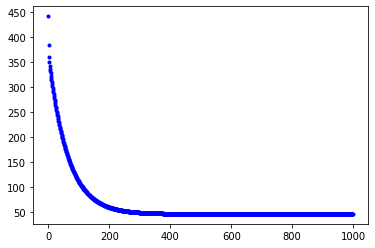

In [47]:
# Plot the learning curve.

plt.plot(range(1000), history, 'b.')

**Discussion**
1. Change $r$ to 0.000001 and 1. Observe the MSE curve.

Answer: A large learning rate will likely make the parameter go over the minimum. As a result, the learning curve will explode.

2. Do the initial parameter values matter?

The initial values determine the path of the gradient descent.

3. How to determine when to stop the iteration?
- It depends the time we can afford.
- If the learning curve becomes flat to a long time, it indicates that the MSE cannot be lower much more.
- If the MSE value stablizes, it may imply that it has reached the minimum.